Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


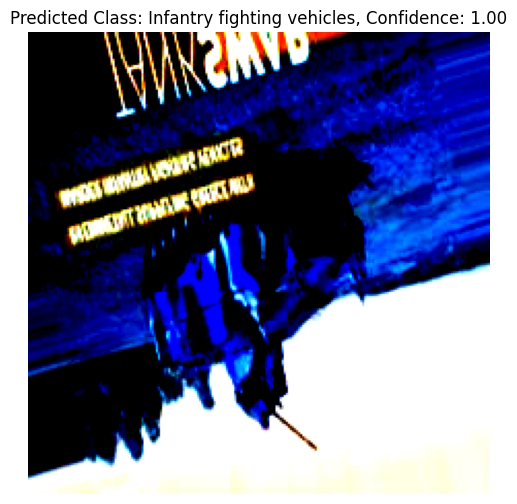

In [26]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

# Constants
IMG_SIZE = 224
MODEL_PATH = './model_resnet18_20240412_114847.pt'
TEST_DATA_PATH = "/mnt/d/FY2023/DataSets/milVehs/dataset/test"

# Load the saved model
model = torch.load(MODEL_PATH, map_location='cpu')
model.eval()

# Define data preprocessing transformation for the test image
test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test dataset
test_dataset = ImageFolder(TEST_DATA_PATH, transform=test_transform)
class_labels = test_dataset.classes

# Select a random image from the test dataset
random_idx = np.random.randint(len(test_dataset))
image, label = test_dataset[random_idx]

# Perform inference on the image
with torch.no_grad():
    image = image.unsqueeze(0)  # Add batch dimension
    outputs = model(image)
    probabilities = F.softmax(outputs, dim=1).squeeze().numpy()

# Get the predicted class and confidence score
predicted_class = np.argmax(probabilities)
predicted_label = class_labels[predicted_class]
confidence_score = probabilities[predicted_class]

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image.squeeze().permute(1, 2, 0))  # Convert to numpy array and rearrange dimensions
plt.axis('off')

# Set the title of the image with the predicted class and confidence score
plt.title(f'Predicted Class: {predicted_label}, Confidence: {confidence_score:.2f}')

# Show the plot
plt.show()
